In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
majors = pd.read_csv('college_majors.csv')
majors.head()

,Unnamed: 0,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,0,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,1751,12313,1042,0.060023,50000,36000,60000,3275,5351,703
1,1,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,24387,52243,8947,0.096798,35000,25000,45000,37389,38119,14839
2,2,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,7494,23106,2393,0.061169,33000,25000,42000,2325,23341,9063
3,3,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,2064,5949,510,0.055677,29000,20000,36000,563,7384,3163
4,4,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,4690,9085,2006,0.119511,35000,25000,45000,4545,8794,2495


In [5]:
majors.drop(columns = ['Unnamed: 0'], inplace=True)
majors.columns

Index(['Major', 'Major_category', 'Grad_total', 'Grad_sample_size',
       'Grad_employed', 'Grad_full_time_year_round', 'Grad_unemployed',
       'Grad_unemployment_rate', 'Grad_median', 'Grad_P25', 'Grad_P75',
       'Nongrad_total', 'Nongrad_employed', 'Nongrad_full_time_year_round',
       'Nongrad_unemployed', 'Nongrad_unemployment_rate', 'Nongrad_median',
       'Nongrad_P25', 'Nongrad_P75', 'Grad_share', 'Grad_premium', 'Total',
       'Men', 'Women', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [ ]:
##### SALARIES #####

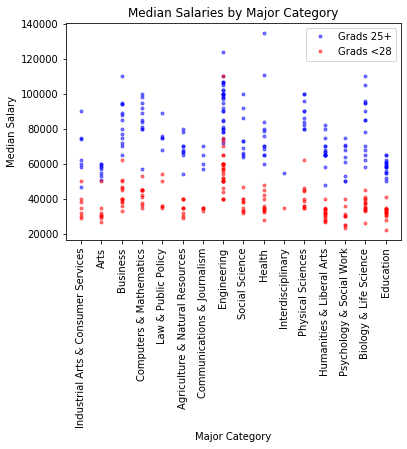

In [77]:
### Plot Median Salaries by Major Category ###
plt.plot(majors['Major_category'], majors['Grad_median'], marker='.', linestyle='none', color='b', alpha=0.5, label='Grads 25+')
plt.plot(majors['Major_category'], majors['Median'], marker='.', linestyle='none', color='r', alpha=0.5, label='Grads <28')
plt.xticks(rotation=90)
plt.xlabel('Major Category')
plt.ylabel('Median Salary')
plt.title('Median Salaries by Major Category')
plt.legend()


In [ ]:
# From the above plot, it looks like the major categories with the highest median salaries include Health, 
# Biology & Life Science, Engineering, followed by Physical Sciences, Computers & Mathematics, and Business. 
# Lowest median salaries seem to belong to Interdisciplinary, Arts, followed by Education and Communications 
# & Journalism. 

In [126]:
majors.sort_values('Major_category',inplace=True) # (Majors ordered by category)
majors.head()

,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
43,FORESTRY,Agriculture & Natural Resources,24713,487,16831,14102,725,0.041296,78000.0,52000,...,891,1763,322,0.096726,35000,28600,48000,1096,1692,327
79,ANIMAL SCIENCES,Agriculture & Natural Resources,56807,1335,47755,39047,596,0.012327,70300.0,48000,...,5353,10824,917,0.050862,30000,22000,40000,5443,9571,2125
47,NATURAL RESOURCES MANAGEMENT,Agriculture & Natural Resources,29357,659,23394,19087,711,0.029496,70000.0,50000,...,2613,6954,842,0.066619,35000,25000,42000,4333,5808,1405
62,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,14800,305,10592,8768,216,0.019985,80000.0,53000,...,620,1528,182,0.077250,40000,27000,54000,535,893,94
7,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,17488,386,13104,11207,473,0.034838,67000.0,41600,...,2196,9093,649,0.050031,40000,25000,50000,1925,6221,1362


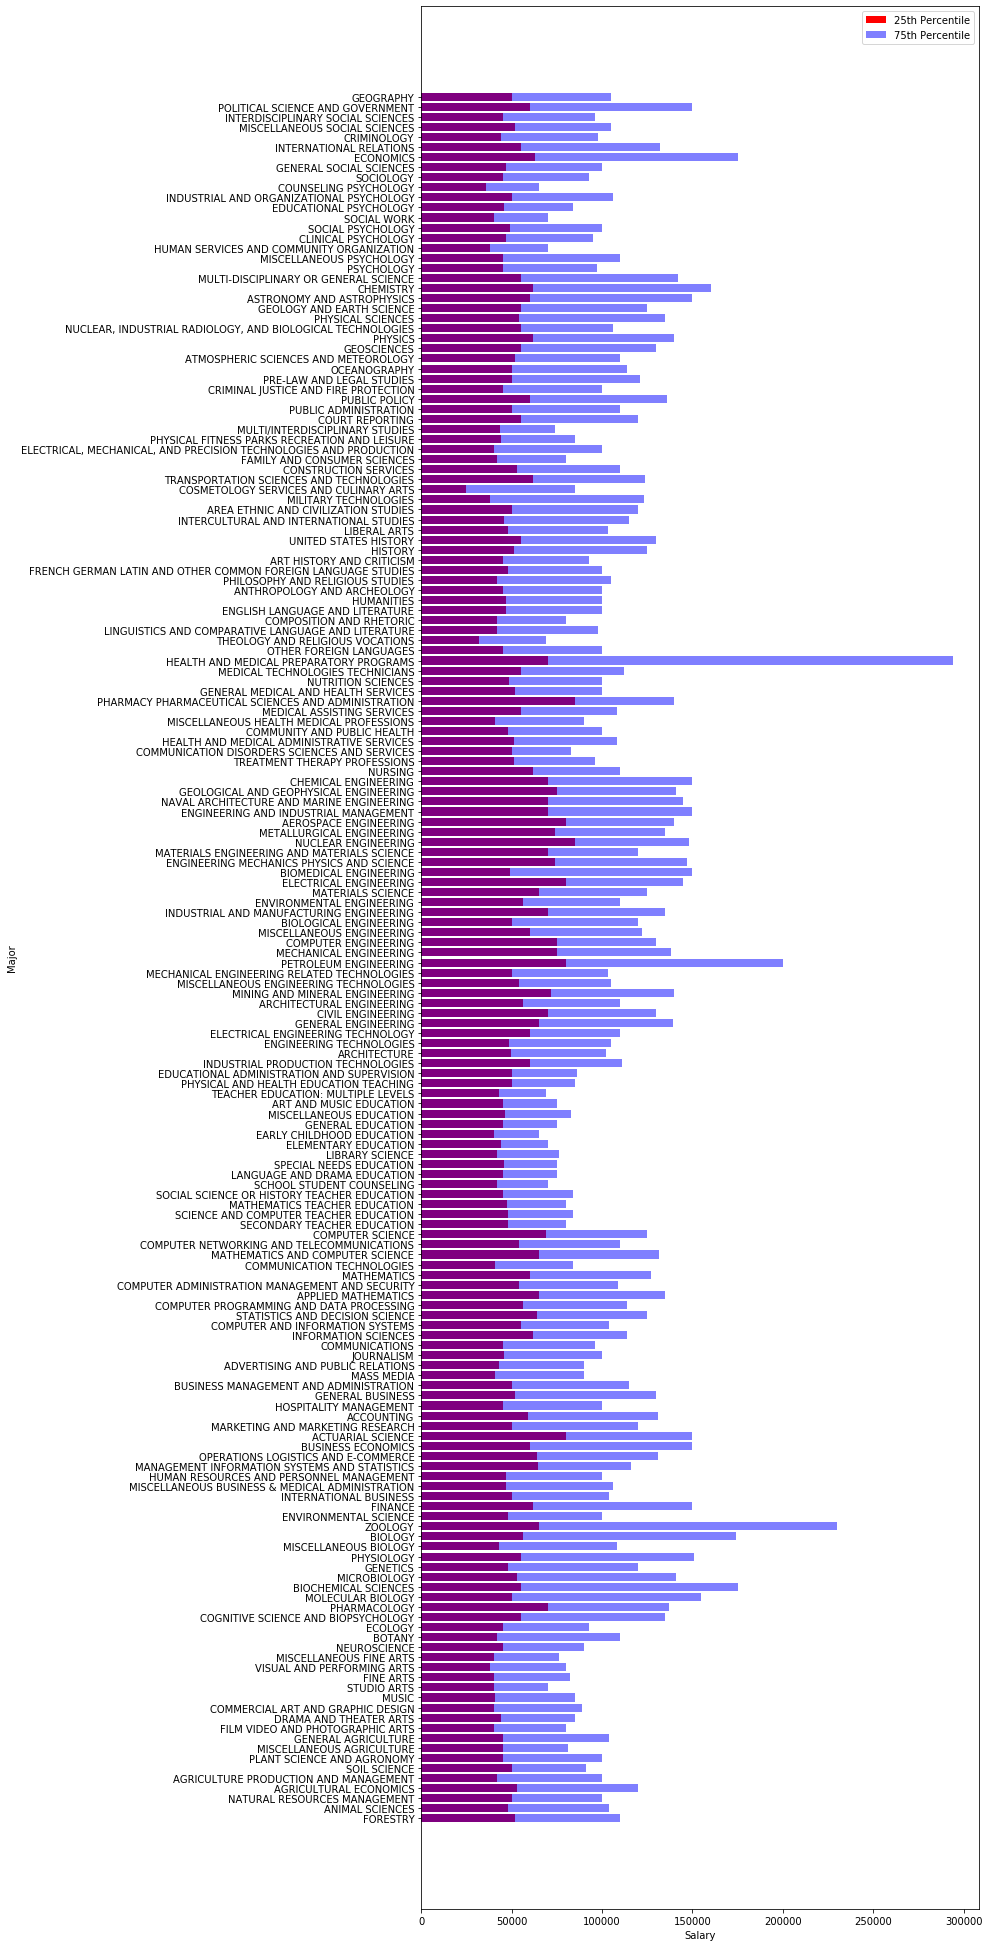

In [127]:
### Plot Q1, Q3 for Salary of each Major (for grads 25+) ###
fig, ax = plt.subplots(figsize=(10,35))
ax.barh(majors['Major'], majors['Grad_P25'], color='r', label='25th Percentile')
ax.barh(majors['Major'], majors['Grad_P75'], color='b', alpha=0.5, label='75th Percentile')

ax.set_xlabel('Salary')
ax.set_ylabel('Major')
ax.legend()

In [128]:
# The above plot seems to illustrate a number of insights. We see trends of higher-level salaries for engineering 
# majors, for example, with a significant peak for petroleum engineering specifically. We see similar trends in the 
# hard sciences (business/finance and biology/zoology, etc.). Biggest peak for Health and Medical Preparatory 
# Programs--likely common for high-level medical positions. This visualization offers further insight/detail to the 
# previous plot.

In [163]:
##### EMPLOYMENT #####

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

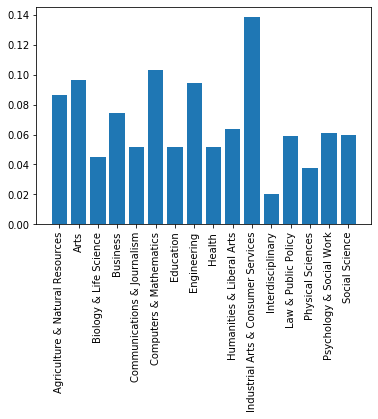

In [174]:
plt.bar(majors['Major_category'], majors['Grad_unemployment_rate'])
plt.xticks(rotation=90)

In [131]:
##### DEMOGRAPHICS #####

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

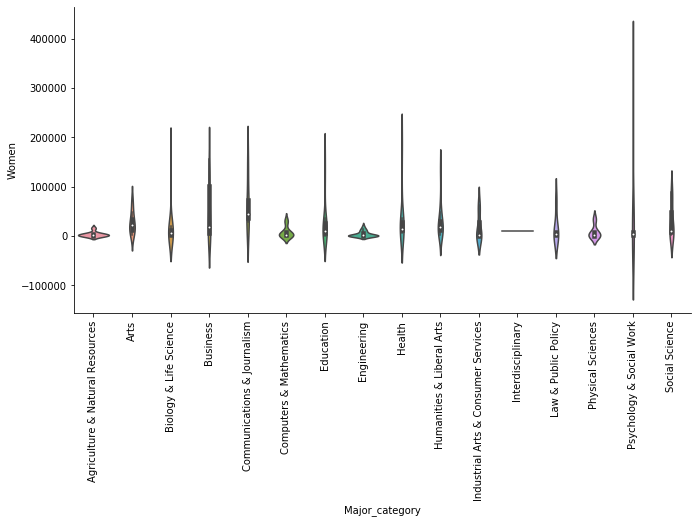

In [156]:
### display median salary by major category, while showing dist of men and women
### want to split men on one side, women on the other
sns.catplot(x='Major_category', y='Women', kind='violin', data=majors, height=5, aspect=2, split=True) 
plt.xticks(rotation=90)

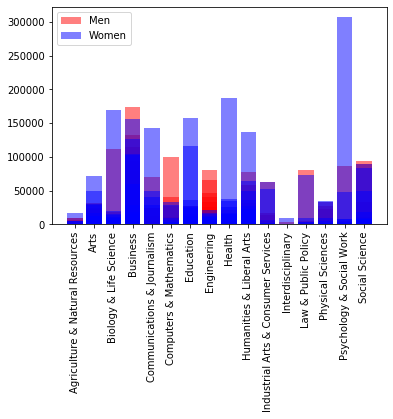

In [193]:
### plot demographics for each major/category
### want to change to swarmplot to display values for each major
plt.bar(majors['Major_category'], majors['Men'], label='Men', color='r', alpha=0.5)
plt.bar(majors['Major_category'], majors['Women'], label='Women', color='b', alpha=0.5)
plt.xticks(rotation=90)
plt.legend()